# **Dia 3: Secuencias y Análisis Filogenético**

En este Notebook, se realizará algunos pasos importantes para realizar análisis filogenéticos utilizando el método de máxima verosimilitud.

**RESULTADOS ESPERADOS**

* **Alineamiento Múltiple** con genoma de referencia
* **Construcción de Árbol Filogenético** con el mejor modelo de sustitución de nucleótidos
* **Visualización** Rápida del árbol construido


##**Pasos lógicos para construir el árbol Filogenético**
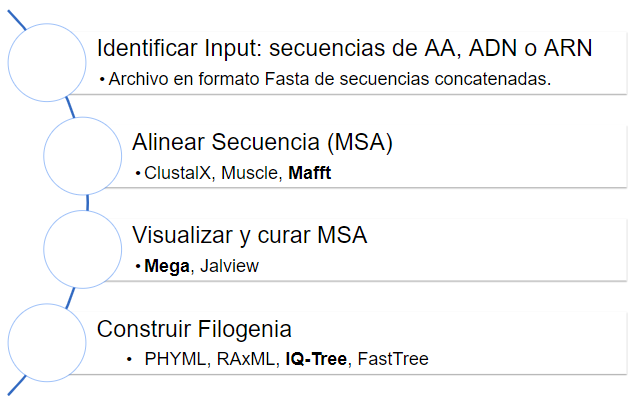


* [**MAFFT**](https://mafft.cbrc.jp/alignment/software/) para alineación del genoma
* [**MEGA**](https://www.megasoftware.net/docs) para visualizar el MSA
* [**IQ-TREE**](http://www.iqtree.org/) para la construcción de un árbol filogenético de máxima verosimilitud
* [**Phylo**](https://biopython.org/wiki/Phylo) de biopython para una visualización rápida de árboles

## Instalación de software



In [1]:
#verifique la versión de Python
!python --version

Python 3.10.12


In [2]:
#Importe e instale condacolab
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:18
🔁 Restarting kernel...


In [3]:
#Instale por medio de conda los software que ejecutará a lo largo de la práctica
!conda install -c bioconda mafft iqtree biopython pandas

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - biopython
    - iqtree
    - mafft
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.83             |  py310h2372a71_0         2.6 MB  conda-forge
    ca-certificates-2023.11.17 |       hbcca054_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         15

## Conjunto de secuencias a analizar (Input).

Para esta práctica utilizaremos dos set de datos correspondientes a las secuencias de interés de SARS-CoV-2 y la secuencia de referencia.

In [1]:
#Ejecute wget seguido de la URL.
 #Esto le permitirá cargar los archivos del repositorio.

#Secuencias de interés
!wget https://github.com/diseasesdetectives/Curso_Bioinformatica_para_profesionales_de_la_salud_publica/raw/master/data_curso/Modulo_2/secuencias.fasta

--2024-01-19 04:21:52--  https://github.com/diseasesdetectives/Curso_Bioinformatica_para_profesionales_de_la_salud_publica/raw/master/data_curso/Modulo_2/secuencias.fasta
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/diseasesdetectives/Curso_Bioinformatica_para_profesionales_de_la_salud_publica/master/data_curso/Modulo_2/secuencias.fasta [following]
--2024-01-19 04:21:53--  https://raw.githubusercontent.com/diseasesdetectives/Curso_Bioinformatica_para_profesionales_de_la_salud_publica/master/data_curso/Modulo_2/secuencias.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1193794 (1.1M) [

In [2]:
#Ejecute wget seguido de la URL.
 #Esto le permitirá cargar los archivos del repositorio
!wget -q -O - "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=MN908947.3&rettype=fasta" > referencia_Sars.fasta

In [3]:
#Ejecute ls para listar los archivos y directorios.
  #Esto le permitirá verificar que el archivo este cargado en el directorio.
!ls

condacolab_install.log	referencia_Sars.fasta  sample_data  secuencias.fasta


In [4]:
#Ejecute head seguido del archivo .fasta importado.
  #Esto le permitirá visualizar las primeras 10 lineas del archivo.
!head secuencias.fasta
#!head referencia_Sars.fasta

>hCoV-19/Colombia/DC-INS-VG-25605/2022|EPI_ISL_15826567|2022-10-28
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTAT
AATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG
TTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCA
ACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTG
GAGGAGGTCTTATCAGAGGCACGTCAACATCTTAGAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCC
TCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGG
TAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCA
GTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGGTACGGCGCCGATCTAAAGTC
ATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTG


In [5]:
#Ejecute grep para contar y listar los IDs en el archivo secuencias.fasta
  #El carácter ">" indica que desea buscar y contar
  #Añada la opción -c para ver el total de Secuencias en el archivo.
!grep ">" -c secuencias.fasta
!grep ">" secuencias.fasta

40
>hCoV-19/Colombia/DC-INS-VG-25605/2022|EPI_ISL_15826567|2022-10-28
>hCoV-19/Colombia/DC-LSPSDS-347423/2022|EPI_ISL_16253415|2022-11-29
>hCoV-19/Colombia/ANT-LDSP4096/2022|EPI_ISL_16402341|2022-12-13
>hCoV-19/Colombia/PUT-INS-VG-27452/2023|EPI_ISL_16736308|2023-01-05
>hCoV-19/Colombia/ANT-CWOHC-VG-SEC04264Z/2022|EPI_ISL_16944563|2022-11-30
>hCoV-19/Venezuela/Dtto8964/2023|EPI_ISL_17389566|2023-03-27
>hCoV-19/Colombia/CUN-INS-VG-29520/2023|EPI_ISL_17776089|2023-04-26
>hCoV-19/Peru/TAC-INS-45494/2023|EPI_ISL_17976510|2023-06-23
>hCoV-19/Peru/LIM-INS-45578/2023|EPI_ISL_17981643|2023-06-22
>hCoV-19/Colombia/DC-LSPSDS-31530/2023|EPI_ISL_18058306|2023-06-22
>hCoV-19/Venezuela/DttoLAB0/2023|EPI_ISL_18059768|2023-04-06
>hCoV-19/Colombia/DC-INS-VG-30163/2023|EPI_ISL_18064932|2023-06-26
>hCoV-19/Colombia/SAN-INS-VG-30104/2023|EPI_ISL_18064977|2023-06-06
>hCoV-19/Colombia/DC-INS-VG-30332/2023|EPI_ISL_18071790|2023-07-06
>hCoV-19/Colombia/SAN-INS-VG-30346/2023|EPI_ISL_18071791|2023-07-16
>hCoV-1

## Alineamiento de secuencias múltiples (MSA)
   
Se ejecutará MAFFT para el alineamiento multiple (MSA). Existen varias opciones para alinear secuencias usando MAFFT.

El alineamiento puede llevar días para secuencias muy largas si se ha elegido el algoritmo más preciso. Si está alineando secuencias cortas, como un gen menos conservado, puede utilizar opciones más precisas. MAFFT tiene buenos ejemplos de qué usar y cuándo usarlo en su [sitio web](https://mafft.cbrc.jp/alignment/software/algorithms/algorithms.html)

In [ ]:
##Ejecute --help o -h para proporcionar más información sobre las opciones de MAFFT
 #https://mafft.cbrc.jp/alignment/software/closelyrelatedviralgenomes.html
!mafft --help

In [ ]:
#Después de dividir las secuencias de entrada en referencia y secuencias de interés, escriba:
#mafft --6merpair --addfragments otrassecuencias secuenciareferencia > salida

!mafft --6merpair --addfragments secuencias.fasta referencia_Sars.fasta > secuencias_aln.fasta

In [ ]:
#Ejecute ls para listar los archivos y directorios.
  #Esto le permitirá verificar la existencia del alineamiento.
!ls

In [ ]:
##Visualice el MSA generado en formato fasta
!cat secuencias_aln.fasta

##Análisis Local en [MEGA](https://megasoftware.net/dload_win_beta)

Después de realizar el elineamiento, es necesario inspeccionar y eliminar las zonas no homólogas.

**¡Este es quizás el paso más importante!**

###Instrucciones:

In [ ]:
##Descargue el archivo de salida que corresponde al alineamiento multiple obtenido en el paso anterior
   #files.download invocará al navegador para que descargue el archivo en su ordenador local.
from google.colab import files

files.download('secuencias_aln.fasta')

*   **En su local** abra el software MEGA:
            1. Siga la ruta y seleccione el alineamiento descargado--> File/Open A file session...
            2. Seleccione Align
  
* Visualice la [anotación de SARS-CoV-2](https://www.ncbi.nlm.nih.gov/gene?LinkName=nuccore_gene&from_uid=1798172431) y detecte las posición del primer gen (ORF1ab) y último gen (ORF10).
            
* Regrese a MEGA y elimine las regiones desalineadas iniciales y finales.

            1. Selecione cualquier posición de la secuencia de referencia y en la parte inferior **w/o gaps**
            2. En la opción **site#** añada la coordenada del último gen
            3. Seleccione desde esa posición hasta el final(Shift+fin) para todas las secuencias (Shift+avpag).
            4. En la parte superior seleccione el icono ❌ y elimine la región seleccionada.
            5. En la opción **site#** añada la coordenada del primer gen
            6. Seleccione desde esa posición hasta el inicio (Shift+inicio) para todas las secuencias (Shift+avpag).
            7. En la parte superior seleccione el icono ❌ y elimine la región seleccionada.
  
* Exporte y guarde el alineamiento.

## Construcción Árbol Filogenetico.

Se ejecutará IQTREE para construir el árbol. Las especies cercanas por lo general tienen pocas diferencias en sus secuencias, mientras que las menos emparentadas tienden a tener más.

Usaremos nuestra alineación final, recortada y filtrada para inferir las relaciones filogenéticas de nuestras secuencias utilizando el criterio de optimización de Máxima verosimilitud.

In [ ]:
from google.colab import files

uploaded = files.upload()
!ls

In [ ]:
##--help o -h se utiliza para proporcionar los flag que se pueden implementar del software
!iqtree -h

In [ ]:
#Para ejecutar iqtree incluya el alineamiento y los flags seleccionados con su respectiva información
!iqtree -s secuencias_aln_sinUTRs.fas -m TEST -alrt 1000 -B 1000

# -s: nombre del archivo de alineado y curado
# -m: selección de modelo. Busca el mejor modelo
# -B: número de réplicas para bootstrap ultra-rápido
# -alrt: número de réplicas

In [ ]:
#Visualice los archivos generados por iqtree
!ls

#### Archivos de salida iqtree

Cuando se complete el proceso, los archivos de salida se encontrarán en la carpeta, que incluyen:

*   **secuencias_aln_sinUTRs.fas.lmap.contree:** el árbol de consenso con soportes de ramas asignados
*   **secuencias_aln_sinUTRs.fas.treefile:** el árbol ML en formato NEWICK, que puede verse con cualquier programa de visualización de árboles que admita NEWICK
*   **secuencias_aln_sinUTRs.fas.iqtree:** el archivo de informe de análisis principal. Contiene una representación textual del árbol final.
*   **secuencias_aln_sinUTRs.fas.log:** archivo de registro de toda la ejecución (el mismo que se muestra en pantalla).
*   **secuencias_aln_sinUTRs.fas.ckp.gz :** archivo de punto de control para reanudar corrida.
*   **secuencias_aln_sinUTRs.fas.mldist :** archivo con matriz de distancia
*   **secuencias_aln_sinUTRs.fas.mldist :** archivo con valores de soporte en porcentaje para todas las divisiones (biparticiones), calculados como las frecuencias de ocurrencia en los árboles de arranque.

In [ ]:
#Para ejecutar iqtree incluya el alineamiento y los flags seleccionados con su respectiva información
#Añada el mejor modelo definido TIM+F+I y --redo para que sobreescriba

!iqtree -s secuencias_aln_sinUTRs.fas -m TIM+F+I -alrt 1000 -B 1000 --redo

# -s: nombre del archivo de alineado y curado
# -m: selección de modelo. Busca el mejor modelo
# -B: número de réplicas para bootstrap ultra-rápido
# -alrt: número de réplicas

In [ ]:
#Visualice los archivos generados por iqtree
!ls

###Visualización rápida

In [ ]:
# visualizar en pantalla el árbol
!cat secuencias_aln_sinUTRs.fas.iqtree

In [ ]:
#Ejecute biopython para ver los resultados de nuestra inferencia filogenética usando la herramienta _Phylo_.
from Bio import Phylo
tree = Phylo.read("secuencias_aln_sinUTRs.fas.treefile", "newick")
Phylo.draw(tree)

In [ ]:
#files.download invocará al navegador para que descargue el archivo en su ordenador local.
from google.colab import files

files.download('secuencias_aln_sinUTRs.fas.treefile')

**📚 TAREA:** Ahora, como ejercicio final, analicemos nuestros archivos:

1. ¿Especifique cuántas secuencias del set de datos a analizar corresponden a Colombia?

In [ ]:
#Conteo en multifasta
!grep "" -? ?.fasta

2. Si compara el número de secuencias del multifasta incial y el del alineamiento notará que cambia, ¿De cuánto es la diferencia? En que punto cree usted que el set de datos cambió y por qué?

In [ ]:
#Conteo en multifasta
!grep "" -c  ?.fasta
!grep "" -c  ?aln.fasta

3. ¿Cite tres conclusiones finales de la filogenia obtenida?